In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
# csv link: https://docs.google.com/spreadsheets/d/12IU6IvKchtKJ3nBvwDcS_5HqmC8G6KxW18HGRIfDPjI/edit?usp=sharing

In [3]:
df = pd.read_csv('Series - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'], format='mixed')
# game_order = ['8 Ball', 'Archery', 'Darts', 'Cup Pong', 'Mini Golf', 'Knockout', 'Shuffleboard', '9 Ball', 'Tanks']
bargroup = (df.groupby(['Game', 'Result']).count()).astype(int)
# bargroup = bargroup.reindex(game_order, level='Game')
pointgroup = (df.groupby(['Date', 'Result']).count()).astype(int)
all_dates = df['Date'].unique()
all_results = df['Result'].unique()
multi_index = pd.MultiIndex.from_product([all_dates, all_results], names=['Date', 'Result'])
pointgroup = pointgroup.reindex(multi_index, fill_value=0)
pointgroup = pointgroup.reindex(df['Date'].unique(), level='Date')

# Ensure all unique values for result are present for each game in bargroup even if the value is 0
all_games = df['Game'].unique()
multi_index_bargroup = pd.MultiIndex.from_product([all_games, all_results], names=['Game', 'Result'])
bargroup = bargroup.reindex(multi_index_bargroup, fill_value=0)

bargroup['Win Ratio (Aidan/Oliver)'] = bargroup.apply(lambda row: row['Date'] / bargroup.loc[(row.name[0], 'Oliver Win'), 'Date'] if row.name[1] == 'Aidan Win' else (bargroup.loc[(row.name[0], 'Aidan Win'), 'Date'] / row['Date'] if row.name[1] == 'Oliver Win' else 0), axis=1)

bargroup = bargroup.sort_values(by='Win Ratio (Aidan/Oliver)', ascending=False)
pointgroupnodraw = pointgroup[pointgroup.index.get_level_values('Result') != 'Draw']

In [4]:
games = df['Game'].unique()
win_percentages = []

for g in games:
    game_df = df[(df['Game'] == g) & (df['Result'] != 'Draw')]
    sender_wins = game_df[game_df['Sender'] == game_df['Result'].str.split().str[0]].shape[0]
    total_games = game_df.shape[0]
    sender_win_percentage = (sender_wins / total_games) * 100 if total_games > 0 else 0
    win_percentages.append((g, sender_win_percentage))

win_percentages.sort(key=lambda x: x[1], reverse=True)
print('Sender Win Percentages:')
for g, sender_win_percentage in win_percentages:
    print(f'{g}: {sender_win_percentage:.2f}%')


Sender Win Percentages:
Archery: 71.11%
8 Ball: 59.02%
Knockout: 57.14%
Darts: 54.90%
Mini Golf: 54.72%
Shuffleboard: 47.46%
9 Ball: 44.26%
Cup Pong: 34.43%
Tanks: 20.00%


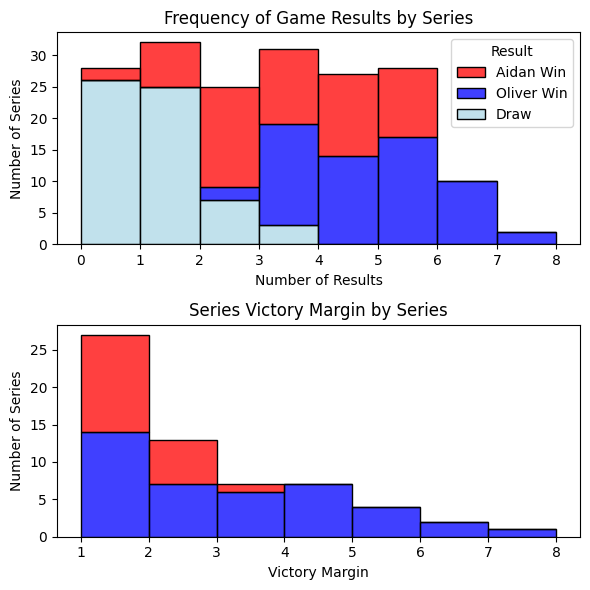

In [ ]:
resultfreq = []
result = []
date = []
results = df['Result'].unique()

for d in df['Date'].unique():
    x = df[df['Date'] == d]
    for i in results:
        if i in x['Result'].unique():
            resultfreq.append(len(x[x['Result'] == i]))
        else:
            resultfreq.append(0)
        result.append(i)
        date.append(d)
resultfreqdf = pd.DataFrame({'Date': date, 'Result Frequency': resultfreq, 'Result': result})

margin = []
winner = []

for d in resultfreqdf['Date'].unique():
    x = resultfreqdf[resultfreqdf['Date'] == d]
    y = np.array(x['Result Frequency'])[1] - np.array(x['Result Frequency'])[0]
    if y > 0:
        margin.append(y)
        winner.append('Aidan')
    else:
        margin.append(-y)
        winner.append('Oliver')
margindf = pd.DataFrame({'Victory Margin': margin, 'Winner': winner})

fig, ax = plt.subplots(2, 1, figsize=(6, 6))

colors = ['red', 'blue', '#add8e6']
sns.set_palette(colors)
invertedresult = ['Aidan Win', 'Oliver Win', 'Draw']
hist1 = sns.histplot(data=resultfreqdf, x='Result Frequency', hue='Result', bins=8, hue_order=invertedresult, multiple='stack', ax=ax[0])
hist1.set_title('Game Results by Series')
hist1.set_xlabel('Number of Results')
hist1.set_ylabel('Number of Series')

hist2 = sns.histplot(data=margindf, x='Victory Margin', hue='Winner', bins=np.max(margindf['Victory Margin'])-1, multiple='stack', palette=['red', 'blue'], hue_order=['Aidan', 'Oliver'], ax=ax[1], legend=False)
hist2.set_ylabel('Number of Series')
hist2.set_xlabel('Victory Margin')
hist2.set_title('Series Victory Margin by Series')

plt.tight_layout()

plt.savefig('3Result Frequency.png', dpi=600)


Series sent by Aidan:
    Aidan 12–22 Oliver
Series sent by Oliver:
    Aidan 8–19 Oliver
Total Series Wins:
    Aidan 20–41 Oliver
Total Game Wins:
    Aidan 182–268 Oliver (48 Draws)


/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_1358/2287226988.py:86: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  b.set_xticklabels(b.get_xticklabels(), rotation=90)


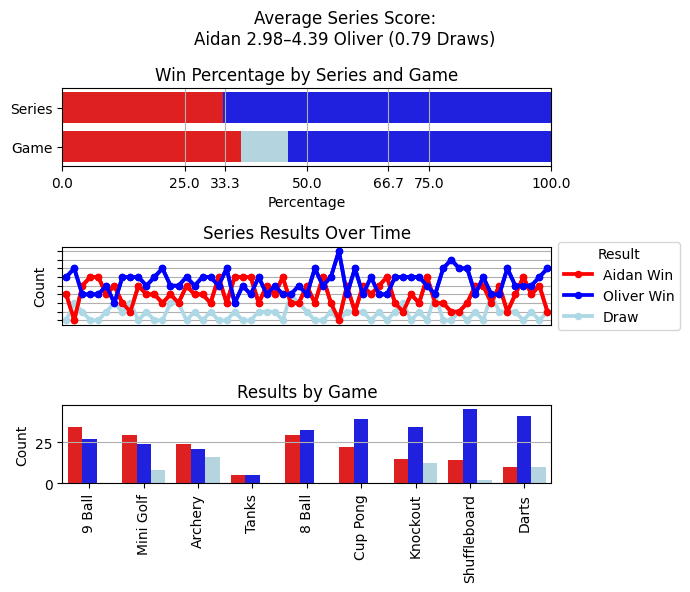

In [6]:
# Calculate the number of series won per player
aidan_wins = []
oliver_wins = []
winner = []
sender = []
aidan_winsbyseries = []
oliver_winsbyseries = []
drawsbyseries = []

for d in df['Date'].unique():
    series_df = df[df['Date'] == d]
    aidan_winsbyseries.append(len(series_df[series_df['Result'] == 'Aidan Win']))
    oliver_winsbyseries.append(len(series_df[series_df['Result'] == 'Oliver Win']))
    if len(series_df[series_df['Result'] == 'Aidan Win']) > len(series_df[series_df['Result'] == 'Oliver Win']):
        winner.append('Aidan')
    else:
        winner.append('Oliver')
    drawsbyseries.append(len(series_df[series_df['Result'] == 'Draw']))
    if 'Aidan' in series_df['Sender'].unique():
        sender.append('Aidan')
    else:
        sender.append('Oliver')
    a_wins = series_df[series_df['Result'] == 'Aidan Win'].shape[0]
    o_wins = series_df[series_df['Result'] == 'Oliver Win'].shape[0]
    if a_wins > o_wins:
        aidan_wins.append('win')
    else:
        oliver_wins.append('win')

sends_df = pd.DataFrame({'Sender': sender, 'Winner': winner})

title = f'Average Series Score:\nAidan {(np.mean(aidan_winsbyseries)):.2f}–{(np.mean(oliver_winsbyseries)):.2f} Oliver ({(np.mean(drawsbyseries)):.2f} Draws)'


fig, ax = plt.subplots(3, 1, figsize=(7, 6), sharey=False)

# Plot the win pct plot
byseriescount = [len(aidan_wins), 0, len(oliver_wins)]
bygamecount = [len(df[df['Result'] == 'Aidan Win']), len(df[df['Result'] == 'Draw']), len(df[df['Result'] == 'Oliver Win'])]

byseriescount_sum = sum(byseriescount)
bygamecount_sum = sum(bygamecount)
byseriescount_normalized = []
bygamecount_normalized = []

for i in range(3):
    if i == 0:
        byseriescount_normalized.append(byseriescount[i] / byseriescount_sum)
        bygamecount_normalized.append(bygamecount[i] / bygamecount_sum)
    elif i == 1:
        byseriescount_normalized.append((byseriescount[i-1] + byseriescount[i]) / byseriescount_sum)
        bygamecount_normalized.append((bygamecount[i-1] + bygamecount[i]) / bygamecount_sum)
    else:
        byseriescount_normalized.append(1)
        bygamecount_normalized.append(1)

ratios = byseriescount_normalized + bygamecount_normalized
percent = []
for i in ratios:
    percent.append(i * 100)

dataframe = pd.DataFrame({'Percent': percent, 'Result': ['Aidan Win', 'Draw', 'Oliver Win'] * 2, 'Category': ['Series'] * 3 + ['Game'] * 3})

colors = ['blue', '#add8e6', 'red']
sns.set_palette(colors)
invertedresult = ['Oliver Win', 'Draw', 'Aidan Win']

for i, x in enumerate(invertedresult):
    sns.barplot(y='Category', x='Percent', data=dataframe[dataframe['Result'] == x], legend=False, ax=ax[0], color=colors[i]).set_xlim(0, 100)
ax[0].set_title('Win Percentage by Series and Game')
ax[0].set_xlabel('Percentage')
ax[0].set_ylabel('')
ax[0].set_xticks([0, 25, 1/3*100, 50, 2/3*100, 75, 100])
ax[0].xaxis.grid(True)

print(f'Series sent by Aidan:\n    Aidan {sends_df[(sends_df['Sender'] == 'Aidan') & (sends_df['Winner'] == 'Aidan')].shape[0]}–{sends_df[(sends_df['Sender'] == 'Aidan') & (sends_df['Winner'] == 'Oliver')].shape[0]} Oliver')
print(f'Series sent by Oliver:\n    Aidan {sends_df[(sends_df['Sender'] == 'Oliver') & (sends_df['Winner'] == 'Aidan')].shape[0]}–{sends_df[(sends_df['Sender'] == 'Oliver') & (sends_df['Winner'] == 'Oliver')].shape[0]} Oliver')
print(f'Total Series Wins:\n    Aidan {len(aidan_wins)}–{len(oliver_wins)} Oliver')
print(f'Total Game Wins:\n    Aidan {len(df[df['Result'] == 'Aidan Win'])}–{len(df[df['Result'] == 'Oliver Win'])} Oliver ({len(df[df['Result'] == 'Draw'])} Draws)')

sns.set_palette(['red', 'blue', '#add8e6'])
hue_order = ['Aidan Win', 'Oliver Win', 'Draw']

b = sns.barplot(y='Date', x='Game', hue='Result', hue_order=hue_order, data=bargroup, ax=ax[2], legend=False)
b.set(ylabel='Count', xlabel='')
b.set_xticklabels(b.get_xticklabels(), rotation=90)
b.yaxis.grid(True)
p = sns.pointplot(y='Game', x='Date', hue='Result', hue_order=hue_order, data=pointgroup, ax=ax[1], markers='.', legend=True)
sns.pointplot(y='Game', x='Date', hue='Result', hue_order=hue_order, data=pointgroupnodraw, ax=ax[1], markers='.', legend=False)
p.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Result')
p.set(xlabel='', ylabel='Count')
p.set_ylim(-.5, np.max(pointgroup['Game'])+.5)
p.yaxis.grid(True)
p.set_xticklabels('')
p.set_yticklabels('')
p.set_xticks([])
b.set_title('Results by Game')
p.set_title('Series Results Over Time')
ax[1].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# ax[2].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.suptitle(title)
plt.tight_layout()
plt.savefig('1Series.png', dpi=600)
plt.show()


/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_1358/1007621165.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['Aidan Win'] = (game_df['Result'] == 'Aidan Win').cumsum()
/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_1358/1007621165.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_df['Oliver Win'] = (game_df['Result'] == 'Oliver Win').cumsum()
/var/folders/3n/fh7zd3gd0b3dp6dcp0tn416h0000gn/T/ipykernel_1358/1007621165.py:18: SettingWithCopyWarning: 
A value is tr

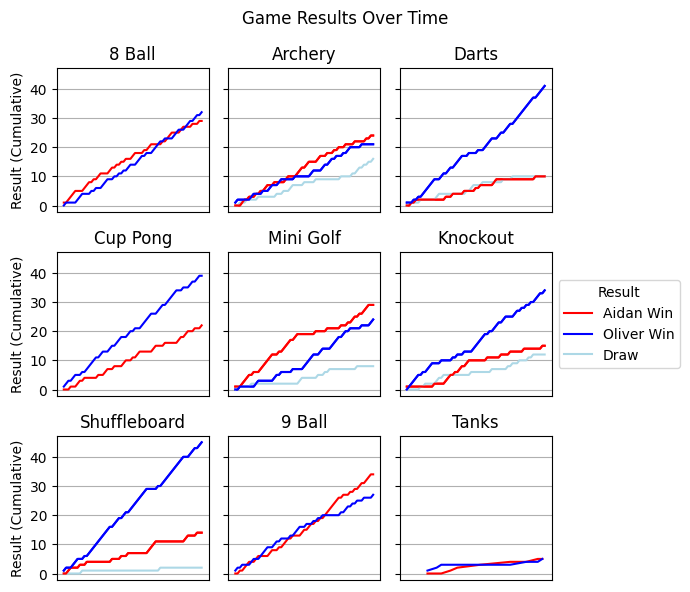

In [7]:
sns.set_palette(['red', 'blue', '#add8e6'])
hue_order = ['Aidan Win', 'Oliver Win', 'Draw']

# Get the unique games
games = ['8 Ball', 'Archery', 'Darts', 'Cup Pong', 'Mini Golf', 'Knockout', 'Shuffleboard', '9 Ball', 'Tanks']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(7, 6), sharex=True, sharey=True)
axes = axes.flatten()

# Loop through each game and create a plot
for i, game in enumerate(games):
    game_df = df[df['Game'] == game]
    
    # Create a cumulative count of wins for each player
    game_df['Aidan Win'] = (game_df['Result'] == 'Aidan Win').cumsum()
    game_df['Oliver Win'] = (game_df['Result'] == 'Oliver Win').cumsum()
    game_df['Draw'] = (game_df['Result'] == 'Draw').cumsum()
    
    # Convert the Date column to string
    game_df['Date'] = game_df['Date'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Melt the dataframe for easier plotting
    melted_df = game_df.melt(id_vars=['Date'], value_vars=['Aidan Win', 'Oliver Win', 'Draw'], 
                             var_name='Player', value_name='Cumulative Wins')
    
    nodraws = [0, 3, 7, 8]

    # Create the line plot
    if i == 5:
        p = sns.lineplot(x='Date', y='Cumulative Wins', hue='Player', hue_order=hue_order, data=melted_df, markers='o', ax=axes[i], legend=True)
        sns.lineplot(x='Date', y='Cumulative Wins', hue='Player', data=melted_df[melted_df['Player'] != 'Draw'], markers='o', ax=axes[i], legend=False)
    elif i in nodraws:
        sns.lineplot(x='Date', y='Cumulative Wins', hue='Player', hue_order=hue_order, data=melted_df[melted_df['Player'] != 'Draw'], markers='o', ax=axes[i], legend=False)
    else:
        sns.lineplot(x='Date', y='Cumulative Wins', hue='Player', hue_order=hue_order, data=melted_df, markers='o', ax=axes[i], legend=False)
        sns.lineplot(x='Date', y='Cumulative Wins', hue='Player', data=melted_df[melted_df['Player'] != 'Draw'], markers='o', ax=axes[i], legend=False)
    axes[i].set_title(f'{game}')
    axes[i].set_xticks([])
    axes[i].set_xlabel('Series')
    axes[i].set_ylabel('Result (Cumulative)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xticklabels('')
    axes[i].yaxis.grid(True)

p.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Result')

plt.suptitle('Game Results Over Time')

# Adjust layout
plt.tight_layout()
plt.savefig('2Series_Cumulative_Wins.png', dpi=600)
plt.show()

      Percent      Result Category
0   32.786885   Aidan Win   Series
1   32.786885        Draw   Series
2  100.000000  Oliver Win   Series
3   36.546185   Aidan Win     Game
4   46.184739        Draw     Game
5  100.000000  Oliver Win     Game


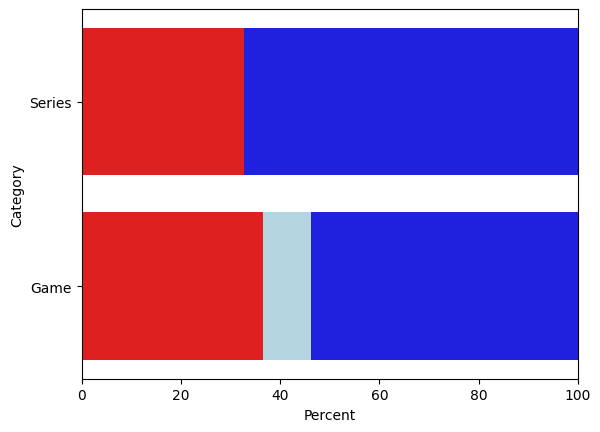

In [8]:
byseriescount = [len(aidan_wins), 0, len(oliver_wins)]
bygamecount = [len(df[df['Result'] == 'Aidan Win']), len(df[df['Result'] == 'Draw']), len(df[df['Result'] == 'Oliver Win'])]

byseriescount_sum = sum(byseriescount)
bygamecount_sum = sum(bygamecount)
byseriescount_normalized = []
bygamecount_normalized = []

for i in range(3):
    if i == 0:
        byseriescount_normalized.append(byseriescount[i] / byseriescount_sum)
        bygamecount_normalized.append(bygamecount[i] / bygamecount_sum)
    elif i == 1:
        byseriescount_normalized.append((byseriescount[i-1] + byseriescount[i]) / byseriescount_sum)
        bygamecount_normalized.append((bygamecount[i-1] + bygamecount[i]) / bygamecount_sum)
    else:
        byseriescount_normalized.append(1)
        bygamecount_normalized.append(1)

ratios = byseriescount_normalized + bygamecount_normalized
percent = []
for i in ratios:
    percent.append(i * 100)

dataframe = pd.DataFrame({'Percent': percent, 'Result': ['Aidan Win', 'Draw', 'Oliver Win'] * 2, 'Category': ['Series'] * 3 + ['Game'] * 3})
print(dataframe)

colors = ['blue', '#add8e6', 'red']
sns.set_palette(colors)
invertedresult = ['Oliver Win', 'Draw', 'Aidan Win']

for i, x in enumerate(invertedresult):
    sns.barplot(y='Category', x='Percent', data=dataframe[dataframe['Result'] == x], legend=False).set_xlim(0, 100)